In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Question 1: Model Selection and Hyper-parameters Tunning

The data_reg.csv file contains a set of 200 examples. Each row represents one example which has two attributes x1 and x2, and a continuous target label y. Using python, implement the solution of the following tasks:

##Part 1:
Read the data from the csv file and split it into training set (the first 120
examples), validation set (the next 40 examples), and testing set (the last 40
examples). Plot the examples from the three sets in a scatter plot (each set
encoded with a different color). Note that the plot here will be 3D plot where
the x and y axes represent the x1 and x2 features, whereas the z-axis is the
target label y.

In [3]:
df = pd.read_csv('data_reg.csv')
df.head()

,x1,x2,y
0,0.548814,0.311796,0.547818
1,0.715189,0.696343,0.576032
2,0.602763,0.377752,0.113475
3,0.544883,0.179604,1.072286
4,0.423655,0.024679,0.624525


info about the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [5]:
# Splittign the data to training, validation, and testing
train_data = df[:120]
validation_data = df[120:160]
test_data = df[160:]

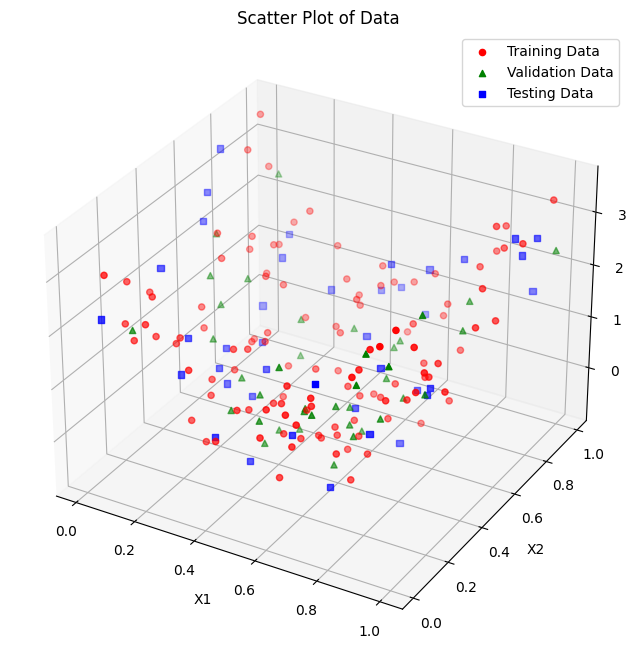

In [6]:
# Plotting the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Training red
ax.scatter(train_data['x1'], train_data['x2'], train_data['y'], c='r', marker='o', label='Training Data')
# Validation green
ax.scatter(validation_data['x1'], validation_data['x2'], validation_data['y'], c='g', marker='^', label='Validation Data')
# Testing blue
ax.scatter(test_data['x1'], test_data['x2'], test_data['y'], c='b', marker='s', label='Testing Data')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Scatter Plot of Data')

ax.legend()
plt.show()

##Part 2

Apply polynomial regression on the training set with degrees in the range of 1 to 10. Which polynomial degree is the best? Justify your answer by plotting the validation error vs polynomial degree curve. For each model plot the surface of the learned function alongside with the training examples on the same plot. (hint: you can use PolynomialFeatures and LinearRegression from scikit-learn library)

Preparing the data

In [7]:
X_train = train_data[['x1', 'x2']]
y_train = train_data['y']
X_val = validation_data[['x1', 'x2']]
y_val = validation_data['y']

Polynomial regression

In [8]:
val_errors = []
models = []

# Polynomial regression for degrees 1 to 10
for degree in range(1,11):
    # Transofrimg features to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)

    # Fitting the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append((degree, model, poly_features))

    # Prediction and error calculation
    y_val_pred = model.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_val_pred)
    val_errors.append(val_error)

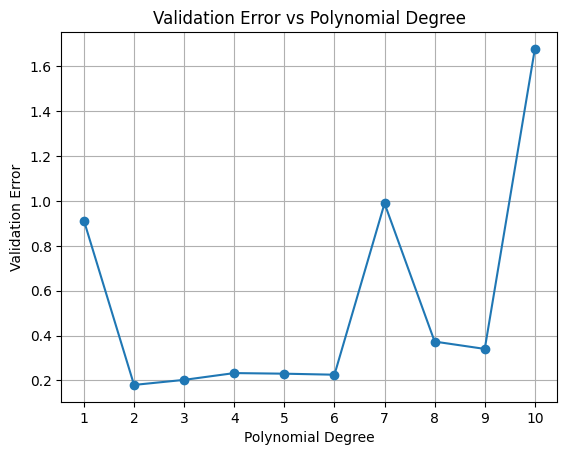

In [9]:
# Plotting the validation error vs polynomial degree
plt.plot(range(1,11), val_errors, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Polynomial Degree')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

Plotting the graph of polynomial of degree 2, since it has the least error:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


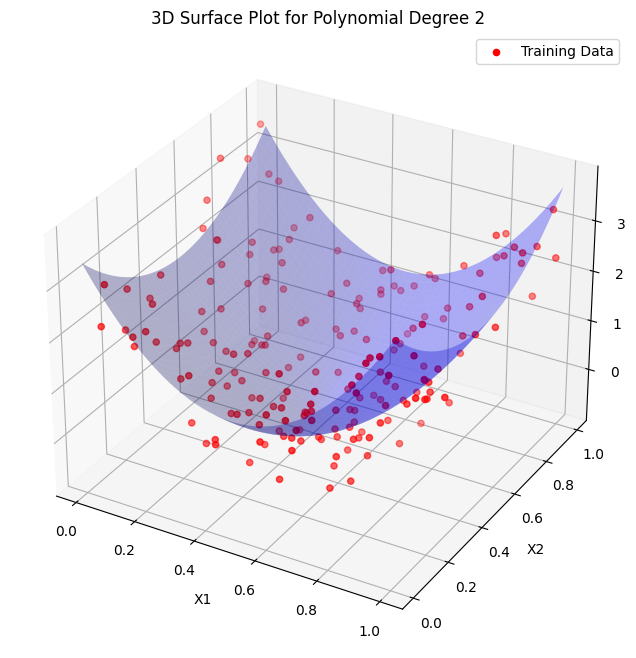

In [10]:
degree, model, poly_features = models[1]

X = df[['x1', 'x2']]
y = df['y']

# Creating the grid axis for plotting using meshgrid which
# turns NumPy arrays into coordinate matrices
x1 = np.linspace(X['x1'].min(), X['x1'].max(), 50)
x2 = np.linspace(X['x2'].min(), X['x2'].max(), 50)
x1, x2 = np.meshgrid(x1, x2)
X_grid = np.c_[x1.ravel(), x2.ravel()]

# Transforming the grid using the polynomial features
X_grid_poly = poly_features.transform(X_grid)

# Predicting using the polynomial model
y_pred = model.predict(X_grid_poly).reshape(x1.shape)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['x1'], X['x2'], y, c='r', marker='o', label='Training Data')
ax.plot_surface(x1, x2, y_pred, color='b', alpha=0.3)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title(f'3D Surface Plot for Polynomial Degree 2')
ax.legend()
plt.show()

Plotting the rest of the polynomials on a 3x3 grid

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

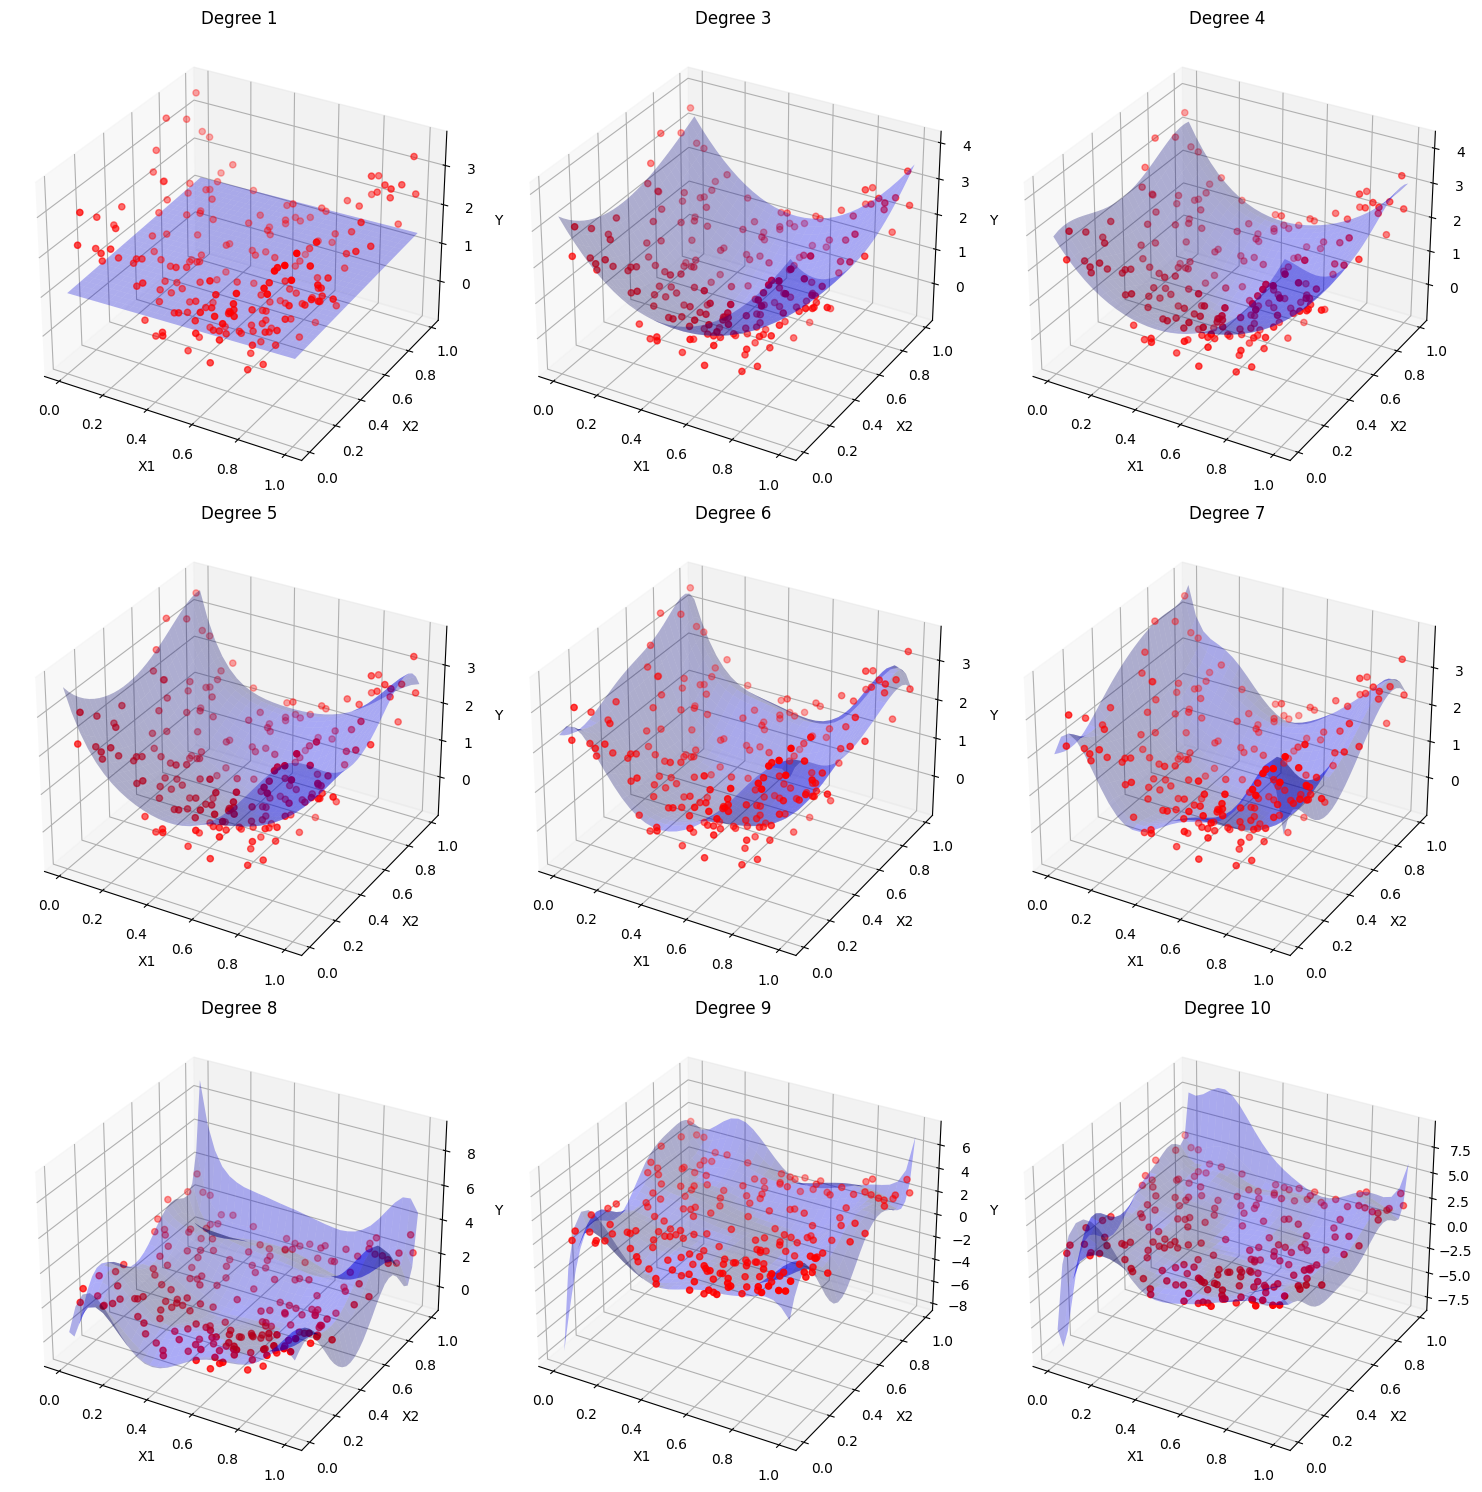

In [11]:
fig, axs = plt.subplots(3, 3, subplot_kw={'projection': '3d'}, figsize=(15, 15))
axs = axs.flatten()

for i in range(1, 11):
    # Skip the degree = 2 because we already plotted it alone
    if i != 2:
      # Polynomial transformation
      poly_features = PolynomialFeatures(degree=i)
      X_poly = poly_features.fit_transform(X)

      # Fitting model
      model = LinearRegression()
      model.fit(X_poly, y)

      # Predictions for a grid of values
      x1_range = np.linspace(X['x1'].min(), X['x1'].max(), 30)
      x2_range = np.linspace(X['x2'].min(), X['x2'].max(), 30)
      x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
      X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
      X_grid_poly = poly_features.transform(X_grid)
      y_pred = model.predict(X_grid_poly).reshape(x1_grid.shape)

      # Plotting
      if i==1:
        ax = axs[i-1]
      else:
        ax = axs[i-2]
      ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.3, color='b')
      ax.scatter(X['x1'], X['x2'], y, color='r')
      ax.set_title(f'Degree {i}')
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_zlabel('Y')

plt.tight_layout()
plt.show()

It is notable that when the degree increases, the complexity of the curve also increases, allowing for more inflextions to suit the data in a better way. It is worth mentioning that an even higher degree will probably lead to overfitting.


##Part 3

Apply ridge regression on the training set to fit a polynomial of degree 8. For the regularization parameter, choose the best value among the following options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the regularization parameter.
(hint: you can use Ridge regression implementation from scikit-learn)

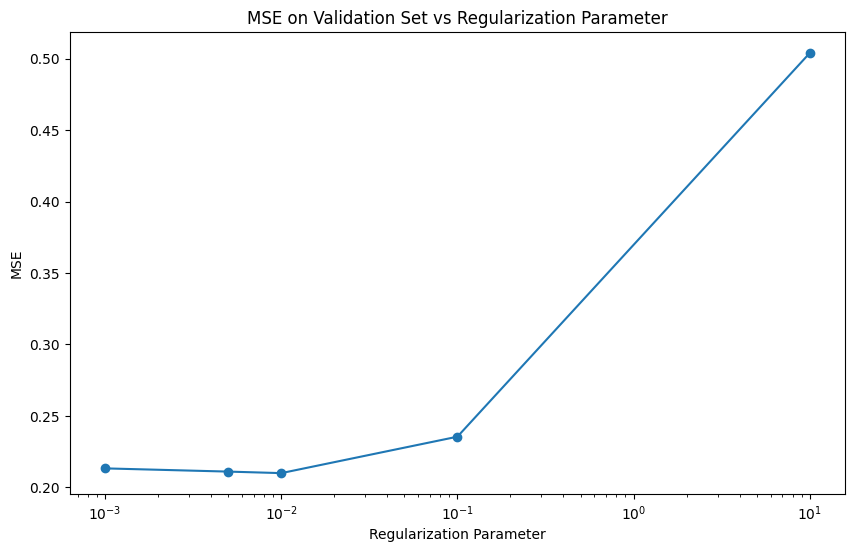

([0.21328335916736343,
  0.2110332820264636,
  0.20996554038850396,
  0.23545304328552383,
  0.5038254258404573],
 [Ridge(alpha=0.001),
  Ridge(alpha=0.005),
  Ridge(alpha=0.01),
  Ridge(alpha=0.1),
  Ridge(alpha=10)])

In [12]:
# Regularization parameters
regularization_params = [0.001, 0.005, 0.01, 0.1, 10]

# Transform the features into polynomial features of degree 8
poly_features = PolynomialFeatures(degree=8)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

# Variables to store results
ridge_models = []
mse_vals = []

# Ridge regression for each regularization parameter
for param in regularization_params:
    ridge = Ridge(alpha=param)
    ridge.fit(X_train_poly, y_train)
    ridge_models.append(ridge)

    # Predict and calculate MSE
    y_val_pred = ridge.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_val_pred)
    mse_vals.append(mse)

# Plotting a Log scaled graph for MSE vs Regularization Parameter
plt.figure(figsize=(10, 6))
plt.plot(regularization_params, mse_vals, marker='o')
plt.xlabel('Regularization Parameter')
plt.ylabel('MSE')
plt.title('MSE on Validation Set vs Regularization Parameter')
plt.xscale('log')
plt.show()

mse_vals, ridge_models

We can see that the optimal regularization parameter here is 0.01, the point in which the least MSE is achieved from the chosen set of parameters. It is worth mentioning that when the regularization parameter is 0, the regression is simply a least square regression, and when it is high, the effect of the penalty increases, leading to a more complex model and eventually leading to underfitting. We can see this as the error reached 50% when the parameter used was 10, indicating clear underfitting.

#Question 2: Logistic Regression

The train_cls.csv file contains a set of training examples for a binary classification problem, and the
testing examples are provided in the test_cls.csv file. The following figures show these examples.

In [13]:
train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')

train_data.head()

,x1,x2,class
0,0.30,0.69,C1
1,-0.77,0.55,C1
2,-0.14,0.89,C1
3,-0.85,0.92,C1
4,-0.26,0.69,C1


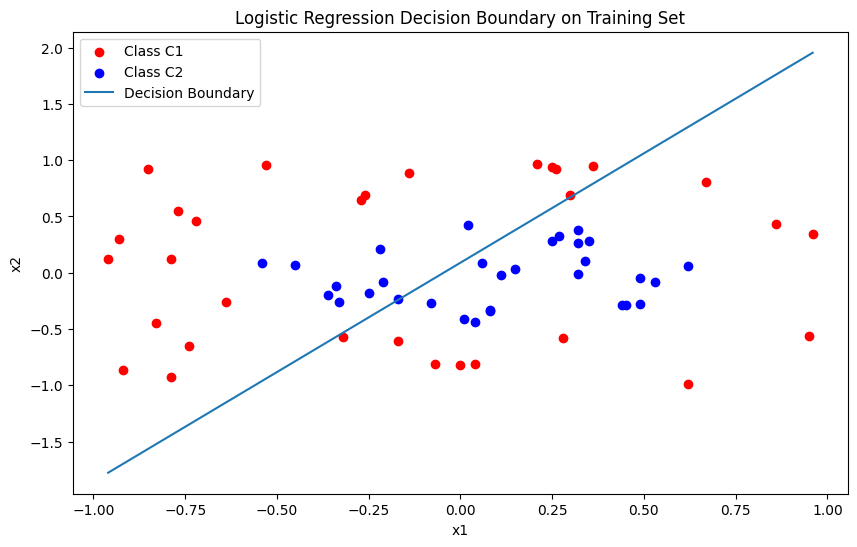

Training accuracy: 0.6612903225806451
Testing accuracy: 0.6818181818181818


In [14]:
# Preparing data
X_train = train_data[['x1', 'x2']]
y_train = train_data['class']
X_test = test_data[['x1', 'x2']]
y_test = test_data['class']

# Fitting the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting on training and testing sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculating accuracies
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

# Plotting decision boundary
coef = log_reg.coef_[0]
intercept = log_reg.intercept_
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train=='C1']['x1'], X_train[y_train=='C1']['x2'], color='red', label='Class C1')
plt.scatter(X_train[y_train=='C2']['x1'], X_train[y_train=='C2']['x2'], color='blue', label='Class C2')

# Decision boundary: ax + by + c = 0 => y = -(ax + c)/b
x_values = np.array([X_train['x1'].min(), X_train['x1'].max()])
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Logistic Regression Decision Boundary on Training Set')
plt.show()

print("Training accuracy:",train_accuracy)
print("Testing accuracy:",test_accuracy)

##Part 2

Repeat part 1 but now to learn a logistic regression model with quadratic decision boundary.

In [15]:
# Transforming the features into quadratic (degree 2) features
poly_features_quad = PolynomialFeatures(degree=2)
X_train_quad = poly_features_quad.fit_transform(X_train)
X_test_quad = poly_features_quad.transform(X_test)

# Learning the logistic regression model with quadratic decision boundary
log_reg_quad = LogisticRegression()
log_reg_quad.fit(X_train_quad, y_train)

# Predicting on training and testing sets with the quadratic model
y_train_pred_quad = log_reg_quad.predict(X_train_quad)
y_test_pred_quad = log_reg_quad.predict(X_test_quad)

# Calculating accuracies for the quadratic model
train_accuracy_quad = np.mean(y_train_pred_quad == y_train)
test_accuracy_quad = np.mean(y_test_pred_quad == y_test)

print("Training accuracy:",train_accuracy_quad)
print("Testing accuracy:",test_accuracy_quad)

Training accuracy: 0.967741935483871
Testing accuracy: 0.9545454545454546


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


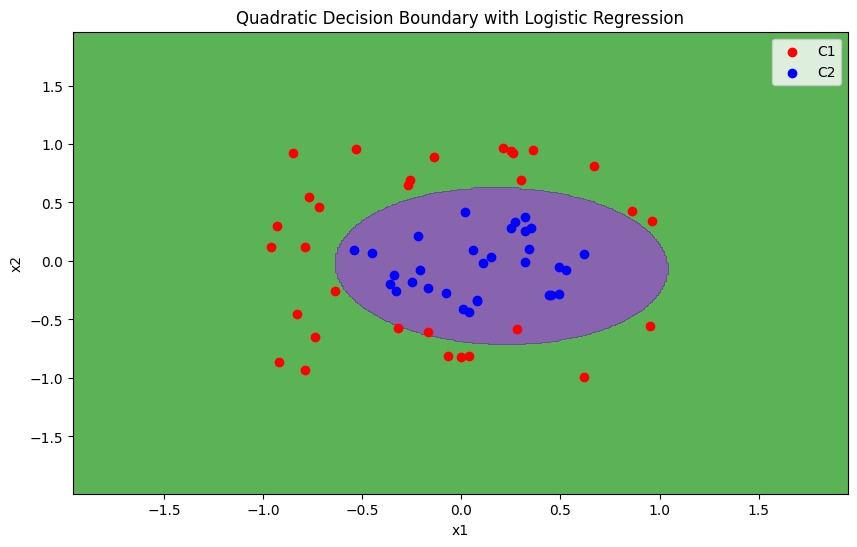

In [16]:
# Converting class labels to numeric values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Learning the logistic regression model with quadratic decision boundary again
log_reg_quad = LogisticRegression()
log_reg_quad.fit(X_train_quad, y_train_encoded)

# Setting min and max values and giving it some padding
x_min, x_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
y_min, y_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
h = 0.01

# Generating a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Transforming the grid using polynomial features
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly_features_quad.transform(grid)

# Predicting the function value for the whole grid
Z = log_reg_quad.predict(grid_poly)
Z = Z.reshape(xx.shape)

# Plotting the contour and training examples
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, levels=np.arange(len(le.classes_)+1)-0.5, cmap=plt.cm.Paired)
plt.scatter(X_train[y_train==le.classes_[0]]['x1'], X_train[y_train==le.classes_[0]]['x2'], color='red', label=le.classes_[0])
plt.scatter(X_train[y_train==le.classes_[1]]['x1'], X_train[y_train==le.classes_[1]]['x2'], color='blue', label=le.classes_[1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Quadratic Decision Boundary with Logistic Regression')
plt.show()


##Part 3

Comment on the learned models in 1 and 2 in terms of overfitting/underfitting.

We can tell that the linear decision boundary classification model was too simple for this data and represents a case of underfitting, this is logical as the data visually cannot be seperated by a straight line. This is also indicated by the bad accuracy in both training (66%) and testing (68%).

On the other hand, the plot for the quadratic decision boundary classification model makes much more sense, and has a very high training accuracy of (96%), which may be a sign of overfitting, however, this is proven not to be the case as the testing accuracy is still very close (95%).